# 다중선형분석 (Multiple Linear Regression)

여러개의 입력값으로 결과 예측하기
```
y = a1 * x1 + a2 * x2 + b
```

Epoch: 0, RMSE = 49.0015, 기울기 a1=7.6546, 기울기 a2=7.8624, y절편 b=80.5909
Epoch: 100, RMSE = 12.8593, 기울기 a1=1.6951, 기울기 a2=0.5477, y절편 b=75.3743
Epoch: 200, RMSE = 10.1451, 기울기 a1=3.7797, 기울기 a2=-2.2959, y절편 b=71.5558
Epoch: 300, RMSE = 8.3716, 기울기 a1=5.2348, 기울기 a2=-3.8552, y절편 b=67.9464
Epoch: 400, RMSE = 7.1924, 기울기 a1=6.1013, 기울기 a2=-4.2736, y절편 b=64.6652
Epoch: 500, RMSE = 6.2786, 기울기 a1=6.5572, 기울기 a2=-3.9362, y절편 b=61.7022
Epoch: 600, RMSE = 5.4869, 기울기 a1=6.7796, 기울기 a2=-3.2036, y절편 b=58.9964
Epoch: 700, RMSE = 4.7901, 기울기 a1=6.8869, 기울기 a2=-2.3188, y절편 b=56.5121
Epoch: 800, RMSE = 4.2017, 기울기 a1=6.9437, 기울기 a2=-1.4268, y절편 b=54.2578
Epoch: 900, RMSE = 3.7413, 기울기 a1=6.9796, 기울기 a2=-0.6114, y절편 b=52.2746
Epoch: 1000, RMSE = 3.4150, 기울기 a1=7.0058, 기울기 a2=0.0820, y절편 b=50.6092
Epoch: 1100, RMSE = 3.2072, 기울기 a1=7.0258, 기울기 a2=0.6365, y절편 b=49.2818
Epoch: 1200, RMSE = 3.0867, 기울기 a1=7.0408, 기울기 a2=1.0588, y절편 b=48.2720
Epoch: 1300, RMSE = 3.0215, 기울기 a1=7.0519, 기울기 a2=1.3693, y절편 b=4

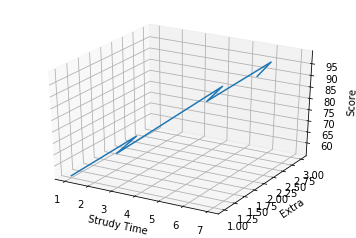

소요시간:  1.1068 s.


In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import time

# 실제 성적
real_scores = [53, 61,72, 84, 89, 92, 97]

# 공부한 시간
study_times = [1, 2, 3, 4, 5, 6, 7]
# 주당 학원 수업 시간 
extra_study_times = [1, 2, 1, 3, 2, 3, 2]


#난수(1행1열, 평균 0, 표준편차 10)를 기반으로 공부한 시간의 기울기 a1 Variable생성 
a1 = tf.Variable(tf.random_uniform([1],0,10, dtype=tf.float64, seed=0)) 

#난수(1행1열, 평균 0, 표준편차 10)를 기반으로 주당 학원 수업 시간 기울기 a2 Variable생성 
a2 = tf.Variable(tf.random_uniform([1],0,10, dtype=tf.float64, seed=0)) 

#난수(1행1열, 평균 0, 표준편차 100)를 기반으로 절편 Variable생성 
b = tf.Variable(tf.random_uniform([1],0,100, dtype=tf.float64, seed=0)) 

# y에 대한 1차방정식(학습시간에 따른 성적 예측 함수) 만들기
y = a1 * study_times + a2 * extra_study_times + b

# 평균제곱근오차 RMSE 함수 만들기
# (실제값과 예측값의 차의 제곱)의 평균값의 제곱근
rmse = tf.sqrt(tf.reduce_mean(tf.square(y - real_scores)))

#학습률 
learning_rate = 0.1

#RMSE값을 최소화하는 기울기값, 절편 찾기 식 민들기
gradient_descent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

start_time = time.time()


# Tensorflow를 이용한 학습
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # 2001번 반복실행
    for step in range(2000):
        sess.run(gradient_descent)
        if step % 100 == 0:
            print("Epoch: %.f, RMSE = %.04f, 기울기 a1=%.4f, 기울기 a2=%.4f, y절편 b=%.04f" % 
                  (step, sess.run(rmse), sess.run(a1), sess.run(a2), sess.run(b)) )
    
    predict_scores = sess.run(y)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(study_times, extra_study_times, predict_scores)

    ax.set_xlabel('Strudy Time')
    ax.set_ylabel('Extra')
    ax.set_zlabel('Score')

    plt.show()
print("소요시간: " , round(time.time() - start_time, 4), "s.")